# Classification_2 
### : Prediction은 Classfication으로 바꿀 수 있고, 둘의 차이는 한끗차이다
FIRA 빅데이터 플랫폼 과정 <데이터마이닝> - 2017.08.21.월 14:00-18:00

### 1. Data
- 1-1. `german_classfication.csv`
- 1-2. Preprocessing : Dummy Variables & Scaling & Change Labels
- 1-3. Train-Test Split : `sklearn.model_selection.test_train_split`

### 2. Logistic Regression
- 2-1. `sklearn.linear_model.LogisticRegression`
- 2-2. Evaluation : Confusion Matrix & ROC Curve

### 3. Decision Tree
- 3-1. `sklearn.tree.DecisionTreeClassifier`
- 3-2. How Does it Decide? - Visualization of Decision Tree via `graphviz`
- 3-3. Interpret Clustering by Decision Tree

### 4. Random Forest
- 4-1. `sklearn.ensemble.RandomForestClassifier`
- 4-2. Evaluation Measure 'RMS' : `sklearn.metrics.mean_squared_error`

### 5. 실습 : 우량 등급 예측 모델 

### 1. Data
---

#### 1-1.  `german_classification.csv` : 우량 700 / not 우량 300 labeling 되어있음. class inbalanced함 우량이 많은경우에 test뽑을때 not 우량인 사람이 아예 안 뽑힐 수 있음 불량 = 1 우량 = 0 관심있는 변수(=불량)를 '1'로 둔다.
---
`german_classification.csv`는 독일 은행에 신용거래를 신청한 신청자 1000명의 데이터이다. 관찰번호(OBS#)를 제외하고 총 29개의 변수로 이루어져있으며, 각 신청자들의 '신용 등급'이 예측하고자 하는 변수이다. 신용 등급은 '우량(1)' 혹은 '불량(2)'으로 나누어지며, 각각 700명, 300명으로 구성되어 있다. 
#### 이 분석의 목적은 불량 등급일 사람을 미리 예측하여, 그들에게 신용 대출을 해주지 않도록 하는 것이다.

In [7]:
import pandas as pd


In [8]:
# 변수별 설명 : CodeList / 마지막 변수가 우량인지 불량인지를 알려줌.
# 저번시간과 마찬가지로 변수 설명을 보고 어떤 변수를 dummy변수를 생성할지 정해야한다(보통 범주형 변수로 설정)
pd.read_csv('CodeList-classification.csv').iloc[:, :4]

,변수명,설명,변수 종류,코드 설명
0,OBS#,관찰번호,-,일련번호
1,CHK_ACCT,당좌 예금 계좌 상태,범주형,"0 : 0 DM 미만, 1 : 0~200 DM 미만, 2 : 200 DM 이상, 3..."
2,DURATION,신용거래 개월 수,수치형,NaN
3,HISTORY,신용기록,범주형,"0 : 신용거래 없음, 1 : 기한 내 변제, 2 : 변제 기한 남음, 3 : 연체..."
4,NEW_CAR,신용목적,이진수형,신형 자동차 0 : 없음 1 : 있음
5,USED_CAR,신용목적,이진수형,중고 자동차 0 : 없음 1 : 있음
6,FURNITURE,신용목적,이진수형,가구/주방기기 0 : 없음 1 : 있음
7,RADIO/TV,신용목적,이진수형,라디오/TV 0 : 없음 1 : 있음
8,EDUCATION,신용목적,이진수형,교육 0 : 없음 1 : 있음
9,RETAINING,신용목적,이진수형,재교육 0 : 없음 1 : 있음


In [9]:
# df
df = pd.read_csv('german_classification.csv').set_index('OBS#')

#### 1-2. Preprocessing : Dummy Variables & Scaling & Change Labels

In [14]:
# dummy varaibles : preprocessed_df
get_dummies_cols = ['CHK_ACCT', 'HISTORY', 'SAV_ACCT', 'EMPLOYMENT', 'JOB']
dummied_df = pd.get_dummies(df, columns=get_dummies_cols)
dummied_df

,DURATION,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETAINING,AMOUNT,INSTALL_RATE,MALE_DIV,...,SAV_ACCT_4,EMPLOYMENT_0,EMPLOYMENT_1,EMPLOYMENT_2,EMPLOYMENT_3,EMPLOYMENT_4,JOB_0,JOB_1,JOB_2,JOB_3
OBS#,,,,,,,,,,,,,,,,,,,,,
0,6,0,0,0,1,0,0,1169,4,0,...,1,0,0,0,0,1,0,0,1,0
1,48,0,0,0,1,0,0,5951,2,0,...,0,0,0,1,0,0,0,0,1,0
2,12,0,0,0,0,1,0,2096,2,0,...,0,0,0,0,1,0,0,1,0,0
3,42,0,0,1,0,0,0,7882,2,0,...,0,0,0,0,1,0,0,0,1,0
4,24,1,0,0,0,0,0,4870,3,0,...,0,0,0,1,0,0,0,0,1,0
5,36,0,0,0,0,1,0,9055,2,0,...,1,0,0,1,0,0,0,1,0,0
6,24,0,0,1,0,0,0,2835,3,0,...,0,0,0,0,0,1,0,0,1,0
7,36,0,1,0,0,0,0,6948,2,0,...,0,0,0,1,0,0,0,0,0,1
8,12,0,0,0,1,0,0,3059,2,1,...,0,0,0,0,1,0,0,1,0,0


In [15]:
# scaling : min-max / min-max방법은 2진수 할 때 0,1 로 나뉘는 경우(범주형 자료)에 많이 씀 
# min-max방법은 normalized랑 다른 방법.
# 로지스틱 regression에서는 scaling이 필요하다.
# 선형문제가 분류 문제에 적합하지 않을때 로지스틱 regression을 활용한다.
# (예) y값이 1 or 2만 있는데, 값들이 그 두값에 split하게 모여있는데,
# 1과 2사이의 값 or 2보다 큰 값은 무슨의미를 지니는지 이 문제가 생김 -> 로지스틱 regression(scaling 필요)
# 로지스틱 regression은 0.5 기준으로 0.5보다 크면 2라고하자 이런식으로 결정내림
# scaling_cols : 왜 이변수들이 선정된거지? : 수치형이니깐.
scaling_cols = ['DURATION', 'INSTALL_RATE', 'AGE', 'NUM_CREDITS', 'AMOUNT']
preprocessed_df = dummied_df.copy()

#식 모양 : 값 - min(값) / max(값) - min(값)
# min-max값이 1인경우 값 = max(값)인 경우, 0인경우 값 = min(값)인 경우
preprocessed_df[scaling_cols] = (preprocessed_df[scaling_cols] - preprocessed_df[scaling_cols].min()) / (preprocessed_df[scaling_cols].max() - preprocessed_df[scaling_cols].min()) 

# preprocessed_df[scaling_cols] 0 과 1사이에 값을 갖는지 확인해본다.
preprocessed_df[scaling_cols]


,DURATION,INSTALL_RATE,AGE,NUM_CREDITS,AMOUNT
OBS#,,,,,
0,0.029412,1.000000,0.857143,0.333333,0.050567
1,0.647059,0.333333,0.053571,0.000000,0.313690
2,0.117647,0.333333,0.535714,0.000000,0.101574
3,0.558824,0.333333,0.464286,0.000000,0.419941
4,0.294118,0.666667,0.607143,0.333333,0.254209
5,0.470588,0.333333,0.285714,0.000000,0.484483
6,0.294118,0.666667,0.607143,0.000000,0.142236
7,0.470588,0.333333,0.285714,0.000000,0.368548
8,0.117647,0.333333,0.750000,0.000000,0.154561


In [16]:
# change Label :1,2로 되어있는 label을 0,1로 해준다.
preprocessed_df.RESPONSE = df.RESPONSE - 1
preprocessed_df.RESPONSE

OBS#
0      0
1      1
2      0
3      0
4      1
5      0
6      0
7      0
8      0
9      1
10     1
11     1
12     0
13     1
14     0
15     1
16     0
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     1
      ..
970    0
971    0
972    1
973    1
974    0
975    0
976    0
977    0
978    1
979    1
980    1
981    1
982    0
983    1
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    1
999    0
Name: RESPONSE, Length: 1000, dtype: int64

In [17]:
# split X, y : axis=1로해야 열을 빼준다. : reponse column자체를 다 빼버리는 것임
# 신용등급 불량인 사람들(=1)이 들어있음
X, y = preprocessed_df.drop('RESPONSE', axis=1), preprocessed_df.RESPONSE
# print(X)
# print(y)

#### 1-3. Train-Test Split : `sklearn.model_selection.train_test_split`
---
지도학습을 위해 주어진 데이터를 train set과 test set으로 나눈다. 이 때, y의 class 비율 (class imbalance)을 고려해서 나누어준다.

In [18]:
# import packages
from sklearn.model_selection import train_test_split

In [19]:
# train_test_split with 'stratify' : 7:3비율 파악해서 알아서 비율 맞춰서 뽑아줌(원하는 column을 써줘야함) 
# 우리는 y비율(7:3)에 맞게 뽑을것임
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 77, stratify=y)

# 위의 식을 이런방식으로도 할 수 있음.
splited_list = train_test_split(X, y, test_size = 0.25, random_state = 77, stratify=y)
X_train = splited_list[0]
X_test = splited_list[1]
y_train = splited_list[2]
y_test = splited_list[3]

#train_test_split(X) 하면 [train_X, test_X] 이렇게 나뉜 list가됨
#train_test_split(X,y)하면 [train_X, test_X, train_y, test_y] 이렇게 나뉜 list가 됨.
#위에 list만들어진거에 인덱스 활용해서 X_train = splited_list[0] , X_test = splited_list[1] 한 것임


In [20]:
# is it true...? : 진짜 7:3 비율이 유지되었나?
y_test[y_test==1] # 1인게 몇개인지 확인 : 75개임을 알 수 있다.
y_test[y_test==0] # 175개임을 알 수 있다.

OBS#
984    0
205    0
743    0
146    0
450    0
279    0
806    0
150    0
996    0
403    0
239    0
520    0
921    0
629    0
680    0
959    0
413    0
723    0
55     0
591    0
103    0
32     0
876    0
895    0
658    0
408    0
976    0
453    0
848    0
231    0
      ..
438    0
94     0
671    0
947    0
623    0
176    0
663    0
657    0
270    0
73     0
390    0
893    0
406    0
833    0
141    0
872    0
40     0
109    0
153    0
17     0
391    0
75     0
794    0
411    0
987    0
697    0
223    0
154    0
396    0
269    0
Name: RESPONSE, Length: 175, dtype: int64

In [21]:
#비율
#175+75 = 250
#75 / 250

### 2. Logistic Regression
---

#### 2-1. `sklearn.linear_model.LogisticRegression`
---

In [22]:
# import packages
from sklearn.linear_model import LogisticRegression

In [13]:
# Parameters
# ★class_weight = 'balanced'★ :  class의 비율을 맞춰줌  y의 비중에 따라서 가중치를 줌  / 
# 동일한 갯수(balanced)로 뽑으면 얼마의 가중치를 줘야하는지라고 생각하자.
# : 아래아래 셀에 있는 0.71428571 이나 1.66667이 알아서 나옴
# fit_intercept = True # 상수를 넣을 것인지
# multi class는 3개이상
# multi_class='ovr' : 0이다 0아니다로 학습 / 1이다 1아니다 / 2이다 2아니다 를 해서 제일 좋은거
# 'multinomial' : 해당class에서 0을 갖을 확률  / 1을 갖을 확률 / 2를 갖을 확률(확률에 초점)

In [23]:
# what does 'balanced' mean?
import numpy as np

# y의 갯수 1000개
n_samples = len(y)
# y의 class갯수 2개
n_classes = len(set(y))
#같은 결과 n_classes = len(np.unique(y))
#class_weight = n_samples/(n_classes*np.bincount(y))
class_weight = 'balanced'

In [24]:
#lr_model / bincount( ) : 몇번씩 나왔는지 알려줌
1000/(2*np.bincount(y)) # 이 식이 뜻하는게 머지?

# 참고
# np.bincount(y) : 빈도수를 
# array([700, 300], dtype=int64)

# 결과 값 : array([ 0.71428571,  1.66666667])
#0.71428571 * (0 class갯수 곱하면 ) : 500개
#1.66666667 * (1 class갯수 곱하면 ) : 500개

lr_model = LogisticRegression(class_weight = class_weight)
lr_model

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [25]:
# fit to model
lr_model.fit(X=X_train,y=y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [26]:
# get predictions
lr_model.predict(X=X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [27]:
# get accuracy : X_test, y_test를 모델에 대입했을때 맞춘게 몇개나 되냐
# 1일때 1이라고 예측하고 0일때 0이라고 예측 잘 한거
lr_model.score(X=X_test, y=y_test) 
# 각행별로 비교해서 분모에는 행갯수 맞출때 분자가 올라감
# TN + TP / TF + FP + FN + TP : 전체중에 정확하게 맞춘게 어떻게 되느냐 

0.69999999999999996

In [28]:
# result_y_test_df : result를 보기위해서 만든거
result_y_test_df = pd.DataFrame(y_test)
result_y_test_df['lr'] = lr_model.predict(X=X_test)
result_y_test_df

,RESPONSE,lr
OBS#,,
984,0,0
736,1,1
205,0,1
743,0,1
146,0,1
450,0,0
834,1,0
279,0,0
806,0,0


#### 2-2. Evaluation : Confusion Matrix & ROC Curve
---

In [29]:
# import packages for confusion matrix
from sklearn.metrics import confusion_matrix

In [30]:
# confusion_matrix
confusion_matrix(y_pred = lr_model.predict(X=X_test), y_true = y_test)
# [[ true negative , false positive],
# [false negative], [true positive]]

array([[120,  55],
       [ 20,  55]])

In [31]:
# import pacakages for ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [34]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = {0: .2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [24]:
# decision_function - for 'thresholds'

In [25]:
# roc_curve : fpr, tpr, thresholds

In [26]:
# auc

In [27]:
#plot_roc_curve(fpr, tpr, roc_auc)

### 3. Decision Tree
---

#### 3-1. `sklearn.tree.DecisionTreeClassifier`
---

In [35]:
# import packages
from sklearn.tree import DecisionTreeClassifier

In [36]:
# set parameters
class_weight = 'balanced'
# 원래 depth 다 돌려보고 max_depth를 결정해야함
max_depth = 5

In [37]:
# dt_model 
dt_model = DecisionTreeClassifier(class_weight=class_weight, max_depth=max_depth)

In [38]:
# fit to model
dt_model.fit(X=X_train, y=y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [39]:
# get predictions
dt_model.predict(X=X_test)

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [40]:
# get score
dt_model.score(X=X_test, y=y_test)

0.60399999999999998

In [41]:
# result_y_test_df
result_y_test_df['dt'] = dt_model.predict(X=X_test)
result_y_test_df


,RESPONSE,lr,dt
OBS#,,,
984,0,0,0
736,1,1,1
205,0,1,1
743,0,1,1
146,0,1,0
450,0,0,0
834,1,0,1
279,0,0,0
806,0,0,0


In [42]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred = dt_model.predict(X=X_test), y_true=y_test)

array([[90, 85],
       [14, 61]])

#### 3-2. How Does it Decide? - Visualization of Decision Tree via `graphviz`
---

In [43]:
# import packages for export tree
from sklearn.tree import export_graphviz

In [44]:
# export tree as .dot
# 'wb' 아니고 'w'임 graphviz에선 byte못 읽음
# feature_names = X.columns하면 grpah그려야 column명으로 그림이 잘 나온다.(의사결정나무에서 잘 나오게하는거)
with open('test_tree.dot', 'w') as f:
    export_graphviz(dt_model, f, feature_names = X.columns)

In [45]:
# import packages for draw tree
import graphviz

# INSTALLATION : 
# conda install pip
# pip install graphviz

# conda uninstall pip
# pip uninstall graphviz
# conda install pip
# pip install graphviz

# conda install pip
# conda install graphviz

# conda install python-graphviz

# 해결: pip install GraphViz


In [46]:
# open .dot & visualize
with open('test_tree.dot', 'r') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# value를 중심으로 보면된다.(class weight를 기준으로 보면된다. 이게 class weight로 본 것임.)
# samples : 몇개가 도달했는지 알려줌
# values : 가중치 적용한 값임(가중치 적용해서 25개 도달) value들의 합은 val

In [40]:
# export to .png
# $ dot -Tpng tree.dot -o tree.png

#### 3-3. Interpret Clustering by Decision Tree

In [41]:
# open bath_soap_clustering.df
import pickle
with open('bath_soap_clustering.df', 'rb') as f:
    clustering_df = pickle.load(f)

In [42]:
y, X = clustering_df.predicted_labels, clustering_df.drop('predicted_labels', axis=1)

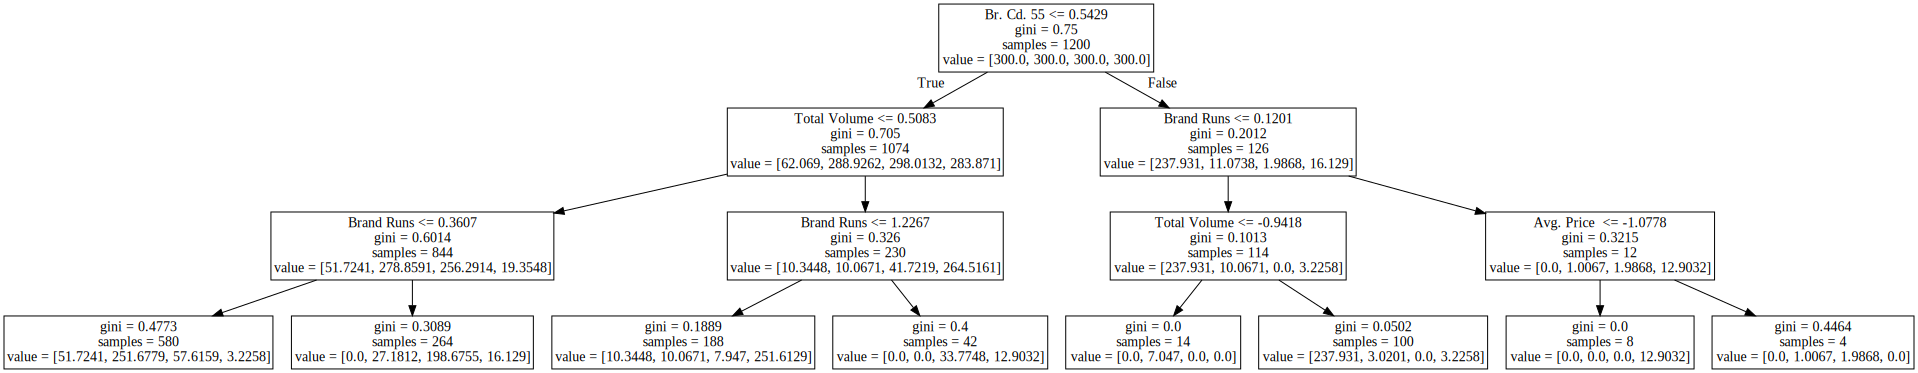

In [55]:
# label이 뜻하는 바 : 1200개 label 4개 300개씩 : label1은 1번군집이란 뜻
# 각 label이 300개씩 있는 경우가 가장 이상적.(class weight를 balanced로 맞췄기 때문에)
# build DT - max_depth, min_samples_leaf, class_weight : 제일 왼쪽에 있는 node는 머든지 안사지만 특히 55번도 안삼.
ip_model = DecisionTreeClassifier(max_depth = 3, class_weight='balanced').fit(X=X, y=y)
#ip_model = DecisionTreeClassifier(max_depth = 3, class_weight='balanced').fit(X=X, y=y, min_samples_leaf = 100)

# visualize
dot_filename = 'clustering_tree.dot'
with open(dot_filename, 'w') as f:
    export_graphviz(ip_model, f, feature_names=clustering_df.columns)
    
with open(dot_filename, 'r') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

### 4. Random Forest
---

#### 4-1. `sklearn.ensemble.RandomForestClassifier`
---

In [44]:
# import packages
from sklearn.ensemble import RandomForestClassifier

In [45]:
# set parameters

# n_estimators : decision tree를 몇개로 할 것인가.
n_estimators = 100
class_weight = 'balanced'
#각각의 decision tree의 depth
max_depth = 5

In [46]:
# rf_model
rf_model = RandomForestClassifier(n_estimators =n_estimators, class_weight = class_weight, max_depth=max_depth)

In [47]:
# fit to model
rf_model.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
# get predictions
rf_model.predict(X=X_test)

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [49]:
# get accuracy
rf_model.score(X=X_test, y=y_test)

0.70799999999999996

In [50]:
# result_y_test_df
result_y_test_df['rf'] = rf_model.predict(X=X_test)
result_y_test_df

,RESPONSE,lr,dt,rf
OBS#,,,,
984,0,0,0,0
736,1,1,1,1
205,0,1,1,1
743,0,1,1,1
146,0,1,0,0
450,0,0,0,0
834,1,0,1,0
279,0,0,0,0
806,0,0,0,0


#### 4-2. Change Threshold to Decide : 0.5넘으면 1이라는걸 0.6 0.7 로 그 기준을 바꿔준다 
---

In [51]:
# import numpy
import numpy as np

In [52]:
# change Treshold

# .predict_prob
lr_model.predict_proba(X=X_test)
#print(lr_model.predict_proba(X=X_test))
# [[ 0.93287448  0.06712552] 첫쨰줄(0.01때) [0으로 배정될 확률?, 1로 배정될 확률?]

# y_pred_prob
y_pred_prob = lr_model.predict_proba(X=X_test)
#thresholds
thresholds = np.arange(0, 1, 0.01) 
# 0.01 단위로 0~1까지 나타냄

# acurracy
from sklearn.metrics import accuracy_score
y_pred = y_pred_prob[:,1] > 0.8
accuracy_score(y_pred=y_pred , y_true =y_test )
#0.8을 threshold로 해서 0.8보다 1로보게된다

# accuracy_by_threshold
accuracies = []
for t in thresholds :
    y_pred = y_pred_prob[:, 1] > t
    accuracies.append(accuracy_score(y_pred=y_pred, y_true = y_test))
accuracies
#print해서 값을 확인하는 경우
#for t in thresholds:
#    y_pred = y_pred_prob[:,1] > t
#    print(accuracy_score(y_pred=y_pred, y_true = y_test))

# 참고
y_pred_prob[:,1] #모든 1이라고 예측한 모든 행렬 구한거
y_pred_prob[:,1] > 0.5 #score처럼 0.5기준으로 True False(=0)나눈거
y_pred_prob[:,1] > 0.8

array([False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,

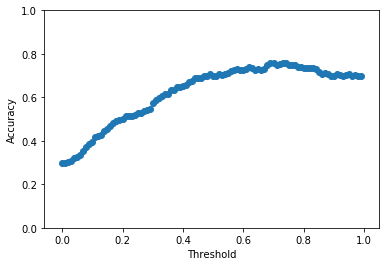

In [53]:
# threshold vs. accuracy score
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.show()

### 5. 실습 : 우량 등급 예측 모델
---
test set(random_state = 88)에 대한 accuracy가 가장 좋은 모델을 만들어라. 
* Logistic Regression, Decision Tree, Random Forest 중 하나를 사용하라.
* 변수의 개수를 적절히 조절하거나,
* threshold를 변경하거나,
* 모델에 들어갈 parameter를 조절하여라.
* Cross Validation은 고려하지 않는다.

실제로 우량 등급인 사람을 우량 등급으로 예측할 경우 \$100의 이익을 얻는 반면, 실제 불량 등급인 사람을 우량 등급으로 예측할 경우 \$500의 손실을 입는다고 할 때, 로지스틱 모델에서 우량 등급으로 예측을 내리기 위한 최적의 경계값(threshold)를 제시하여라. (※ confusion갯수??)
* 위에서 구한 모델에 대한 이익을 계산하여라.
* 10개 이상의 경계값 후보를 살펴보고, 각 경계값별로 이익을 계산하고 최대 이익을 내는 경계값을 찾아라
* 최대 이익을 내는 경계값과 모델의 경계값이 동일한가? 그 이유는 무엇인가?

In [54]:
sum(confusion_matrix(y_pred = y_pred, y_true=y_test).ravel()*[100,0,-500,0])
#이렇게하면 손해 2만달러나옴.

-20000